# Curve fit example

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 15, 10 
plt.rcParams['lines.markersize'] = 10
plt.rcParams['font.size'] = 15

import numpy as np
from scipy.optimize import curve_fit
import inspect
import pandas as pd

In [31]:
def equation(x,m,A,B):
    
    y = m + A*x + B*x**2.5 #This is the actual function
    
    return y

In [32]:
def get_derivatives(coefficients,equation):
    derivatives = {}
    a = inspect.getargspec(equation)
    for coefficient_name,value in zip(a.args[1:],coefficients):
        derivatives[coefficient_name] = value
        
    return derivatives

In [33]:
N = 500;
x = np.linspace(start = 0, stop = 1,num = N)
m = 10
A = 1
B = 2

y = equation(x = x,m = m,A = A,B = B)

mu = 0
sigma = 1

noice = mu + sigma*(1 - 2*np.random.rand(N))
y_distorted = y + noice

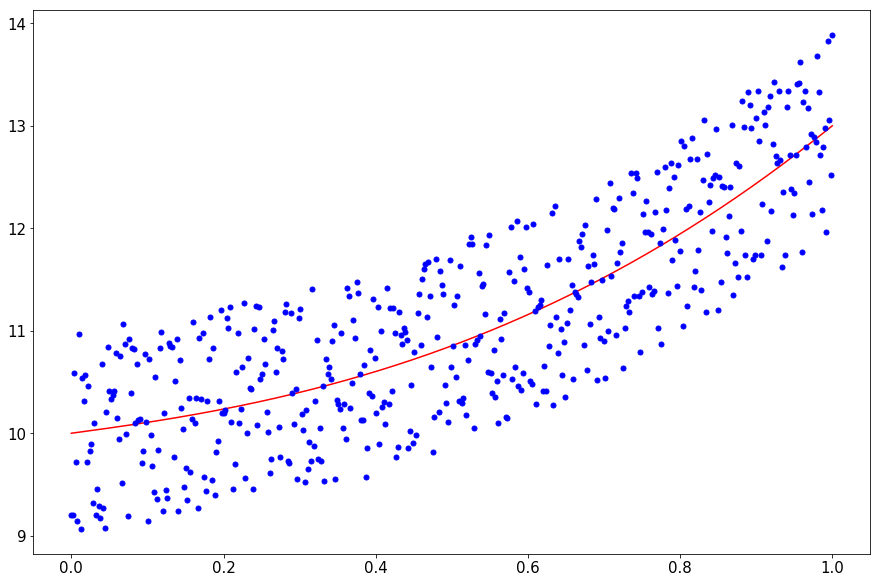

In [34]:
fig,ax = plt.subplots()

ax.plot(x,y,'r-')
a = ax.plot(x,y_distorted,'b.')


## Regression

In [35]:
coefficients, fitCovariances = curve_fit(f = equation, xdata = x, ydata = y_distorted)
coefficients

array([ 10.03922736,   0.8484783 ,   2.18010647])

In [36]:
derivatives = get_derivatives(coefficients = coefficients,equation = equation)
derivatives

c:\dev\curve_fit\venv\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  app.launch_new_instance()


{'A': 0.84847830473618524, 'B': 2.1801064683174389, 'm': 10.039227356653971}

## Predict

In [37]:
y_pred = equation(x = x,**derivatives)

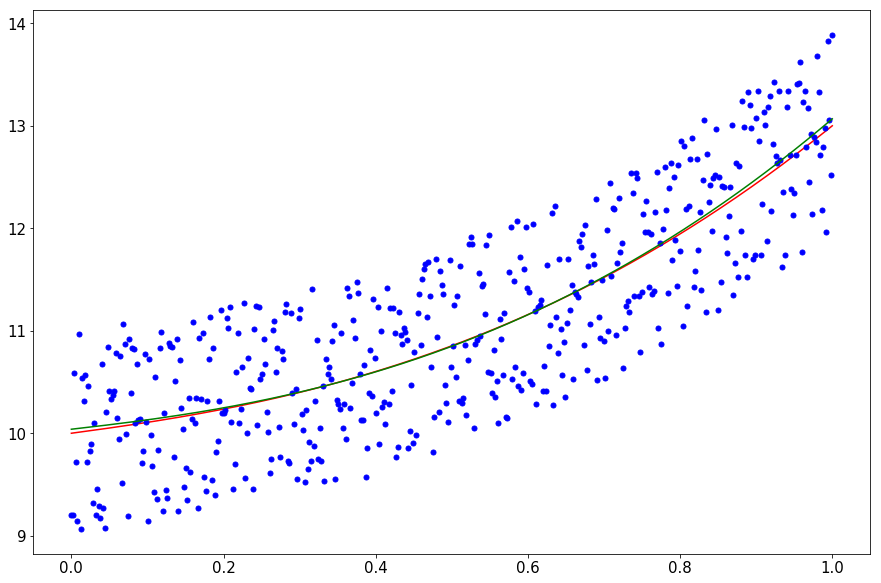

In [38]:
fig,ax = plt.subplots()

ax.plot(x,y,'r-')
a = ax.plot(x,y_distorted,'b.')
a = ax.plot(x,y_pred,'g-')
